<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-агрегированных-данных" data-toc-modified-id="Загрузка-агрегированных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка агрегированных данных</a></span></li><li><span><a href="#Проведем-небольшое-исследование-данных" data-toc-modified-id="Проведем-небольшое-исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проведем небольшое исследование данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-распределение-значений-в-dt-и-visits" data-toc-modified-id="Изучим-распределение-значений-в-dt-и-visits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим распределение значений в dt и visits</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Сохранение-таблицы" data-toc-modified-id="Сохранение-таблицы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сохранение таблицы</a></span></li><li><span><a href="#Анализ-популярности-тем" data-toc-modified-id="Анализ-популярности-тем-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ популярности тем</a></span></li></ul></div>

## Загрузка агрегированных данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Задаём параметры подключения к БД
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

# Формируем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

# Подключаемся к БД
engine = create_engine(connection_string)

In [3]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM dash_visits
        '''

# Выполняем запрос и сохраняем результат
# выполнения в DataFrame.
# Sqlalchemy автоматически установит названия колонок
# такими же, как у таблицы в БД. Нам останется только
# указать индексную колонку с помощью index_col.
data_raw = pd.io.sql.read_sql(query, con = engine)

print(data_raw.head(5))

   record_id item_topic source_topic age_segment                  dt  visits
0    1040597     Деньги         Авто       18-25 2019-09-24 18:32:00       3
1    1040598     Деньги         Авто       18-25 2019-09-24 18:35:00       1
2    1040599     Деньги         Авто       18-25 2019-09-24 18:54:00       4
3    1040600     Деньги         Авто       18-25 2019-09-24 18:55:00      17
4    1040601     Деньги         Авто       18-25 2019-09-24 18:56:00      27


**Данные загружены!**

## Проведем небольшое исследование данных

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


**5 колонок и 30745 строк с данными и посещении карточек**

Изучим скрытые дубликаты категориальных колонок

In [5]:
for col in ['item_topic', 'source_topic', 'age_segment']:
    display(data_raw.value_counts(col))

item_topic
Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
dtype: int64

source_topic
Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
dtype: int64

age_segment
18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
dtype: int64

Разных тем в item_topic : 25
AxesSubplot(0.125,0.125;0.775x0.755)


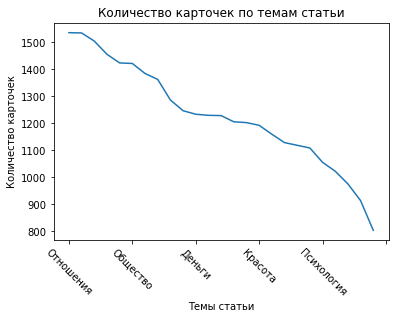

Разных тем в source_topic : 26
AxesSubplot(0.125,0.125;0.775x0.755)


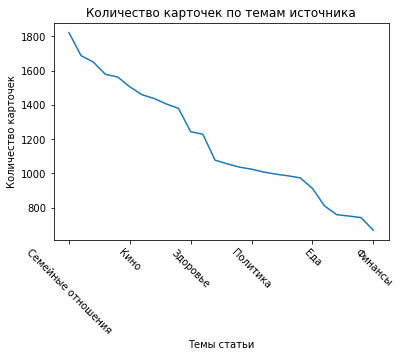

In [6]:
print('Разных тем в', 'item_topic', ':', len(data_raw.value_counts('item_topic')))
print(data_raw.value_counts('item_topic').plot())
plt.xticks(rotation=-45)
plt.title('Количество карточек по темам статьи')
plt.xlabel('Темы статьи')
plt.ylabel('Количество карточек')

plt.show()
    
print('Разных тем в', 'source_topic', ':', len(data_raw.value_counts('source_topic')))
print(data_raw.value_counts('source_topic').plot())
plt.xticks(rotation=-45)
plt.title('Количество карточек по темам источника')
plt.xlabel('Темы статьи')
plt.ylabel('Количество карточек')

plt.show()

В данных скрытых дубликатов не обнаружено.

**Названия тем карточек и источников пересекаются, но не совпадают**

**Всего 25 тем карточек и 26 тем источников**

In [7]:
len(data_raw['record_id'].unique())

30745

**Число уникальных record_id совпадает с размером таблицы - повторов в id нет**

### Изучим распределение значений в dt и visits

In [8]:
data_raw['date'] = pd.to_datetime(data_raw['dt']).dt.date

In [9]:
data_raw['date'].unique()

array([datetime.date(2019, 9, 24)], dtype=object)

В датафрейме данные только за один день - 24 сентября 2019 года

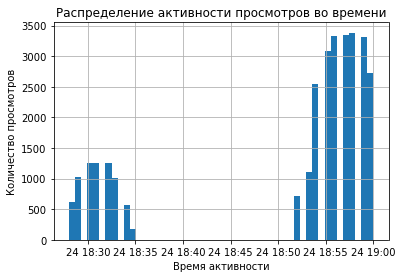

In [10]:
data_raw['dt'].hist(bins=50)
plt.title('Распределение активности просмотров во времени')
plt.xlabel('Время активности')
plt.ylabel('Количество просмотров')
plt.show()

**В датафрейме данные только за два небольших периода времени вечером 24 сентября 2019 года**

Изучим крайние значения распределения `visits`

In [11]:
data_raw.query('visits == 0')

,record_id,item_topic,source_topic,age_segment,dt,visits,date


Нет нулевых значений

In [12]:
print('Число карточек с только 1 визитом:',
      data_raw.query('visits == 1')['record_id'].count())
print('Процент карточек с только одним визитом:',
     round(
         data_raw.query('visits == 1')['record_id'].count()/
     len(data_raw)*100, 2))

Число карточек с только 1 визитом: 8999
Процент карточек с только одним визитом: 29.27


**Почти 30% карточек посетили только один раз**

Число карточек с более 50 визитами: 1167
Процент карточек с более 50 визитами: 3.8


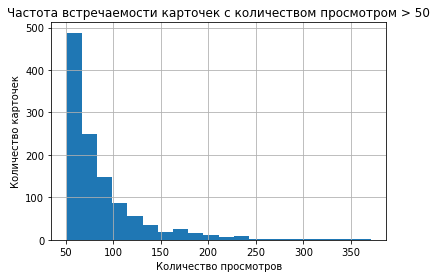

In [13]:
print('Число карточек с более 50 визитами:',
      data_raw.query('visits > 50')['record_id'].count())
print('Процент карточек с более 50 визитами:',
     round(
         data_raw.query('visits > 50')['record_id'].count()/
     len(data_raw)*100, 2))
data_raw.query('visits > 50')['visits'].hist(bins=20)
plt.title('Частота встречаемости карточек с количеством просмотром > 50')
plt.xlabel('Количество просмотров')
plt.ylabel('Количество карточек')
plt.show()

In [14]:
print('Всего карточек с числом визитов больше 250:', len(data_raw.query('visits > 250')))
data_raw.query('visits > 250')

Всего карточек с числом визитов больше 250: 14


,record_id,item_topic,source_topic,age_segment,dt,visits,date
13684,1054281,Наука,Кино,18-25,2019-09-24 18:57:00,264,2019-09-24
13685,1054282,Наука,Кино,18-25,2019-09-24 18:58:00,276,2019-09-24
15617,1056214,Общество,Россия,18-25,2019-09-24 18:56:00,266,2019-09-24
15618,1056215,Общество,Россия,18-25,2019-09-24 18:57:00,331,2019-09-24
15619,1056216,Общество,Россия,18-25,2019-09-24 18:58:00,291,2019-09-24
15620,1056217,Общество,Россия,18-25,2019-09-24 18:59:00,324,2019-09-24
16798,1057395,Отношения,Полезные советы,18-25,2019-09-24 18:56:00,256,2019-09-24
16799,1057396,Отношения,Полезные советы,18-25,2019-09-24 18:57:00,297,2019-09-24
16800,1057397,Отношения,Полезные советы,18-25,2019-09-24 18:58:00,283,2019-09-24
23436,1064033,Рассказы,Путешествия,18-25,2019-09-24 18:56:00,349,2019-09-24


**14 карточек с более чем 250 визитами.**

**Карточек с более 50 визитами - 1167, это 3.8%**

## Вывод

1. 5 колонок и 30745 строк с данными о посещении карточек
2. Названия тем карточек и источников пересекаются, но не совпадают. Всего 25 тем карточек и 26 тем источников
3. Число уникальных record_id совпадает с размером таблицы - повторов в id нет


4. В датафрейме данные только за два небольших периода времени вечером 24 сентября 2019 года


5. Почти 30% карточек посетили только один раз
6. 14 карточек с более чем 250 визитами. Карточек с более 50 визитами - 1167, это 3.8%

## Сохранение таблицы

Добавим столбец со временем, удалив дату

In [15]:
# Удалим ненужный столбец
data_raw = data_raw[['record_id', 'item_topic', 'source_topic', 'age_segment', 'dt',
       'visits']]

# Сохраняем таблицу локаьно для Tableau
data_raw.to_csv('dash_visits.csv', sep='\t')

## Анализ популярности тем

In [16]:
# Сколько всего статей из топ-5 тем карточек
data_raw.pivot_table(
    index='item_topic', values='visits', aggfunc='sum'
).sort_values(by='visits', ascending=False).head().sum()

visits    99756
dtype: int64

In [17]:
# Сколько статей из топ-5 тем карточек в минуту
data_raw.pivot_table(
    index='item_topic', columns='dt', values='visits', aggfunc='sum'
)['2019-09-24 18:58:00'].sort_values(ascending=False).head().sum()

19844

In [18]:
# Какой процент статей из топ-5 тем карточек от всех карточек
len(data_raw)/(data_raw.pivot_table(
    index='item_topic', values='visits', aggfunc='sum'
).sort_values(by='visits', ascending=False).head().sum())*100


visits    30.820201
dtype: float64

In [19]:
# Какие самые популярные сочетания источник-карточка
data_raw.groupby(
    ['source_topic', 'item_topic']
                )['visits'].sum().sort_values(ascending=False).reset_index().rename(
                columns={'source_topic':'Тема источника'
                         , 'item_topic':'Тема карточки'
                         , 'visits':'Количество посещений'}).head(10)

,Тема источника,Тема карточки,Количество посещений
0,Путешествия,Рассказы,4587
1,Россия,Общество,3471
2,Кино,Наука,3279
3,Россия,Россия,2847
4,Полезные советы,Подборки,2795
5,Семейные отношения,Общество,2727
6,Полезные советы,Отношения,2716
7,Путешествия,История,2643
8,Россия,Интересные факты,2567
9,Полезные советы,Здоровье,2335
